## Exploratory Data Analysis on the Haberman dataset.

About that dataset: 

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [0]:
import warnings
warnings.filterwarnings("ignore") #to suppress warnings which might occur when running some plotting commands

In [0]:
#importing all the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#now importing the dataset as dataframe

haberman = pd.read_csv("haberman.csv")
haberman.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:

haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**After the initial probing of the data using .info function I found that:**

1) The study has been conducted from 1958 to 1969.

2) The average age of the participant was 52 years with the minimun age of          participant being 30 years and the maximum being 83 years.

3) 25% of the participant were of the age 44 or below. 50% of the participants were of 52 or below and more than 75% of the population was 60 or below.


In [5]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [6]:
haberman['status'].value_counts()  #We can see there are lot more patients that survived than the patients that didn't survive for 5 years.

1    225
2     81
Name: status, dtype: int64

All four columns are of type integer, hence no data cleaning is required. Let's start with plotting with the purpose of classification. But lets answer some of the questions, such as:

1> What is the "nodes" column ?

2> What is the "status" column ?

To answer these questions need the domain knowledge. Specially what is the terminology that is used with the cancer patients and their treatment.\

**Nodes**: Before or during surgery to remove an invasive breast cancer, your doctor removes one or some of the underarm lymph nodes so they can be examined under a microscope for cancer cells. The presence of cancer cells is known as lymph node involvement.

Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.

When lymph nodes are free, or clear, of cancer, the test results are negative. If lymph nodes have some cancer cells in them, they are called positive. Your pathology report will tell you how many lymph nodes were removed, and of those, how many tested positive for the presence of cancer cells. For example, 0/3 means 3 nodes were removed and 0 were positive, while 2/5 means 5 were removed and 2 were positive.

Reference: [Axillary Lymph Nodes and their connection to Breast Cancer](https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes)

**Status column**: If status column is 1, then the patient survivied for 5 years and longer else if it is 2, then the patient didn't survive for 5 years and died earlier.

In our given data set there are 3 features namely Age, Year of treatment and Nodes, and there is one label, namely 1 for survived and 2 for no survival.

Now let's plot the relationship between the nodes column and the status column.

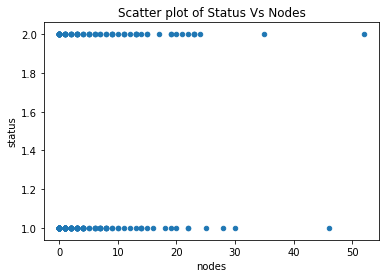

In [7]:
haberman.plot(kind = 'scatter', x = 'nodes', y = 'status');
plt.title("Scatter plot of Status Vs Nodes")
plt.show()

Inference of the 2D scatter-plot: Not much can be inferred from this scatter-plot as the labels does not really show how does the status depends upon the nodes, because they are almost same status for same number of nodes.

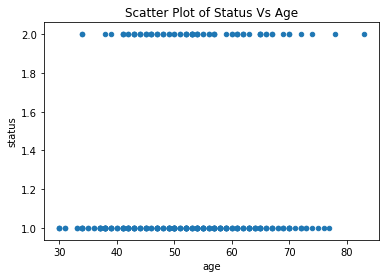

In [8]:
haberman.plot(kind = 'scatter', x = 'age', y = 'status')
plt.title("Scatter Plot of Status Vs Age")
plt.show()

Okay so this plot also doesn't say anything other than that breast cancer has been diagnosed with patients between 35 and 85(approx)

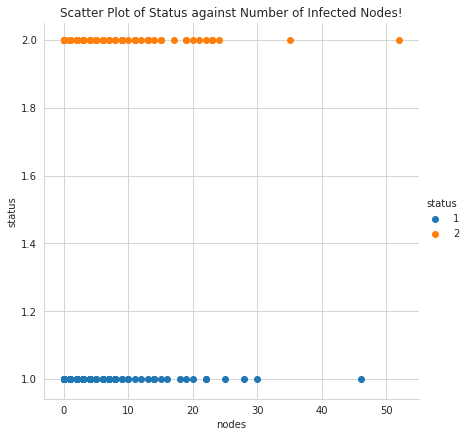

In [9]:
sns.set_style('whitegrid');
sns.FacetGrid(haberman, hue = 'status', size = 6).map(plt.scatter, 'nodes', 'status').add_legend();
plt.title("Scatter Plot of Status against Number of Infected Nodes!")
plt.show();

Fancy plotting, nothing else.

Now let's draw some pair-plots to get some more inference out of our dataset:

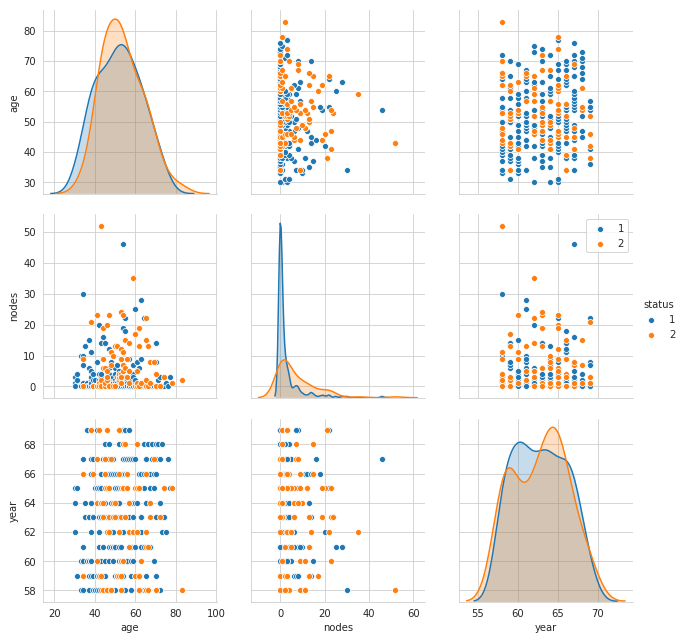

In [24]:
sns.set_style('whitegrid');
sns.pairplot(haberman, hue = 'status', height = 3, vars = ["age", "nodes", "year"])
plt.legend()
plt.show()

Okay so looking at the above pair-plot it is very hard to determine which of the three attributes are the most important in classifying the survival of patients because each of the plot is so jumbled up except the plot of status Vs each of the three features, but then also we can't say which particular range of a particular feature determines the survival of the patient.

In [11]:

fig = px.scatter_3d(haberman, x='age', y='year', z='nodes', color='status')''
fig.show()

SyntaxError: ignored

The above code for 3D plotting has been copied from the following resource: Plotly(https://plot.ly/python/3d-scatter-plots/)

Inference from the 3D plot: Okay so we can see from the legend that all the yellow points are the patients who did not survive. We can slightly infer that most patients who did not  survive had non-zero number of nodes which were infected while some patients who did surivive had zero number of infected nodes. Let's investigate further.

In [0]:
non_zero_nodes = haberman[haberman.nodes != 0]
print(non_zero_nodes.shape)
not_survived_with_non_zero_nodes = non_zero_nodes[non_zero_nodes.status != 1]
print(not_survived_with_non_zero_nodes.shape)
plt.plot(not_survived_with_non_zero_nodes.nodes, np.zeros_like(not_survived_with_non_zero_nodes.nodes), 'ro')
plt.title("1-D scatter plot of Patients who can't survive against number of infected nodes")
plt.xlabel("Number of Infected Nodes")
plt.show()


Hence, out of 81 patients who can't survive, 62 had non-zero number of nodes. So we can say that number of non-zero nodes does play an important role in the classfication of such patients. This also shows that 19 patients did die even if they had zero number of infected lymphic nodes. Puzzuling! Let's find out the number of patients who did survive, even if they had non zero number of infected nodes:

In [0]:
surviving_non_zero_nodes = non_zero_nodes[non_zero_nodes.status == 1]
print(surviving_non_zero_nodes.shape)
plt.plot(surviving_non_zero_nodes.nodes, np.zeros_like(surviving_non_zero_nodes), 'bo')
plt.title("1-D scatter plot of patients who survived and had non zero number of infected nodes")
plt.xlabel("Number of Infected Nodes")
plt.show()

Interesting. 108 patients who had non-zero infected nodes survived 5 years or than 5 years. We have to remember the fact these 108 patients come from a pool of 225 patients who actually survived. And percentage of people who died because they had non-zero infected nodes is (62 / 81) which is around 77% but percentage of people who did not die but stil had non-zero number of nodes is (108/225) which is around 48%. This can somewhat confirm my above claim. Let's confirm this claim by PDFs.

In [0]:
plt.plot(haberman.nodes, haberman.age, 'go')
plt.title('Nodes vs Age')
plt.xlabel("Age")
plt.ylabel("Number OF Nodes")
plt.show()

Again, can't make much sense from the above plot between Nodes and Ages.

In [0]:
sns.FacetGrid(not_survived_with_non_zero_nodes, hue = 'status', height = 5).map(sns.distplot, "nodes").add_legend()
plt.title("PDF plot of Patients who can't survive and also had non zero number of infected nodes")
plt.ylabel("probabilities")
plt.show()


In [0]:
counts, bin_edges = np.histogram(not_survived_with_non_zero_nodes.nodes, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.figure(figsize=(12, 10))
plt.subplot(2,1,1)
plt.xlabel("Number of infected nodes")
plt.title("PDF of patients who can't survive plotted on the number of infected nodes")
plt.plot(bin_edges[1:], pdf, 'r')
plt.subplot(2,1,2)
plt.xlabel("Number of infected nodes")
plt.plot(bin_edges[1:], cdf, 'g')
plt.title("CDF of patients who can't survive plotted on the number of infected nodes")

This is the plot of patient who didn't survive and also had non zero nodes.

In [0]:

sns.FacetGrid(haberman, hue = 'status', height = 5).map(sns.distplot, 'nodes').add_legend()
plt.title("PDF of the Haberman dataset")

plt.show()

This is the PDF of the whole Haberman dataset. It shows the probability densities of both people who survived nd those who can't. It's interesting to see that the peak of the PDF of status-1 is exactly at 0 or very close to 0, but the PDF of status-2 is rather on the right of 0, hence this also confirms the fact that patient who non zero number of lymphic nodes can't survive for 5 or more years.

In [0]:
zero_nodes = haberman[haberman.nodes <= 0]
print(zero_nodes.shape)
died_with_zero_nodes = zero_nodes[zero_nodes.status != 1]
print(died_with_zero_nodes.shape)

From the above computation we can see that out of 136 people who had zero number of infected nodes, only 19 can't survived. Hence, percentage: 19 / 136 = 14%. 14% percent people died, which is low considerd to the opposite to this case, which was around 77%.

Let's plot the PDFs of age and year also to find out if there is any relation b/w the age or year with the survival rate.

In [0]:
sns.FacetGrid(haberman, hue = 'status', height = 5).map(sns.distplot, 'age').add_legend()
plt.title("PDF of the haberman dataset against the ages of the patients")
plt.show()

Let's try with the year they were diagnosed.

In [0]:
sns.FacetGrid(cant_survive, hue = 'status', height = 5).map(sns.distplot, 'year').add_legend()
plt.title("PDF of the patient against the year they were diagnosed!")
plt.show()

Let's draw a CDF for the above PDFs.

In [0]:
counts, bin_edges = np.histogram(haberman.age, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

In [0]:
cdf = np.cumsum(pdf)
plt.figure(figsize = (12, 10))
plt.subplot(2,1,1)
plt.plot(bin_edges[1:], pdf, 'r')
plt.title("PDF of patients who can't survive plotted on their ages")
plt.xlabel("Age")
plt.subplot(2,1,2)
plt.plot(bin_edges[1:], cdf, 'g')
plt.title("CDF of patients who can't survive plotted on their ages")
plt.xlabel("Age")

We can infer from the above CDF that 80% of the patients who can't survive were below 65.

In [0]:
counts, bin_edges = np.histogram(cant_survive.nodes, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Number of infected nodes")
plt.title("CDF of patients who can't survive plotted on the number of infected nodes")


80% of patient who can't survive had more than 10 infected nodes.

Now, let's try out some box plots:-

1- Box plot of Patients who can't survive Vs age

2- Box plot of Patients who can't survive Vs year

3- Box plot of Patients who can't survive vs nodes

In [0]:
sns.boxplot(x = cant_survive.status, y = cant_survive.age, data = cant_survive)
plt.title("Box Plot of patients who can't survive and their ages")
plt.show()

In [0]:
sns.boxplot(x = cant_survive.status, y = cant_survive.year, data = cant_survive )
plt.title("Box Plot of patients who can't survive and the year they were diagnosed in")
plt.show()

In [0]:
sns.boxplot(x = cant_survive.status, y = cant_survive.nodes, data = cant_survive)
plt.title("Box Plot of patients who can't survive and the number of infected Nodes they had")
plt.show()

These boxplots help solidify our findings above, also the above boxplot let's us detect outliers which is just superb. Also the description given by these boxplots also matches our statistics which we obtained using .describe method on the dataset.

Some Interesting Findings:-

1. More than 75% patient who died were diagnosed before 1966.
2. More than 75% patient died before the age of around 62.
3. More than 75% patient who died had more than 10 infected nodes.

Let's try out violin plot on our data.


In [0]:
sns.violinplot(x = cant_survive.status, y = cant_survive.nodes, data = cant_survive)
plt.title("Violin Plot of patients who can't survive and the number of infected nodes they had")
plt.show()

In [0]:
sns.violinplot(x = cant_survive.status, y = cant_survive.age, data = cant_survive)
plt.title("Violin Plot of patients who can't survive and their ages")
plt.show()

In [0]:
sns.violinplot(x = cant_survive.status, y = cant_survive.year, data = cant_survive)
plt.title("Violin Plot of patients who can't survive and the year they were diagnosed in")
plt.show()

Some interesting findings-

1. The probability of dying around the age of 50 was the highest.
2. The probability of dying in the year 1965 was the highest.
3. The patients who can't survive had the highest probability of having less than 5 infected nodes.

# Conclusions:

All the conclusions have been listed below each finding. Moreover we can conclude that:-

1. Patient at the age 0f 50 or more were more likely to not survive.

2. Patient who had number of infected nodes below 5 were more likely to die.

3. Patient were more likely to not survive if they had been diagnosed in the year 1965.


# References: 

Most of the code has been referenced by Exploratory_data_analysis.ipynb which was given as a supplementary material.